# Лабораторная работа №13

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 1. Содержательная постановка задачи

Разработать макроэкономическую модель для анализа роста экономики в условиях изменяющегося числа работающих во времени. В модели учитываются следующие основные аспекты:

1. Динамика числа работающих R в экономике, где прирост числа работающих пропорционален текущему числу работающих $\frac{dR}{dt} = \alpha * R(t)$, что приводит к экспоненциальному росту работающих.


2. Работники в экономике создают национальный доход Y, который делится на потребление w и накопление A. Накопление A используется для замещения устаревших мощностей и создания новых.


3. Производственная функция Y(t) зависит от числа работающих и определена как $Y(t) = M(t) * f(x(t))$, где x(t) - количество работающих на единице мощности.


4. Функция f(x) описывает зависимость производительности от числа работающих на мощности и должна соответствовать следующим условиям: $f(0) = 0$, $\frac{df}{dx} > 0 $(положительный прирост), и $\frac{d^2f}{dx^2} < 0 $(насыщение). Параметр $x_M$ определяет максимальное число работающих на мощности.


5. В случае, когда все места заполнены ($x = x_M$ ), выпуск Y(t) равен максимальной мощности M(t), т.е., $f(x_M) = 1$.

# 2. Концептуальная постановка задачи
Мы стремимся создать модель для оптимизации экономического роста в условиях изменяющегося числа работающих. Оптимальный рост будет достигнут, когда душевое потребление $c(t) = \frac{w(t)} { R(t)}$ работников будет максимальным.

# 3. Математическая постановка задачи

Параметры и переменные:

* R(t) - число работающих в момент времени t


* Y(t) - национальный доход в момент времени t


* w(t) - расходы на потребление в момент времени t


* A(t) - накопленная часть продукта в момент времени t


* M(t) - максимально возможный выпуск продукта в момент времени t


* I(t) - число единиц новой мощности в момент времени t


* $\alpha$ - постоянный коэффициент для расчета A(t) из Y(t)


* $\beta$ - постоянный коэффициент для расчета изменения M(t)


* $\gamma $- постоянный коэффициент для скорости введения новой мощности


Уравнения:

1. Динамика числа работающих: $\frac{dR}{dt} = \alpha * R(t) $ (начальное условие $R(0) = R_0$)


2. Производственная функция: $Y(t) = M(t) * f(x(t))$ 


3. Изменение максимальной мощности: $ \frac{dR}{dt} = I(t) - \beta * M(t)$


4. Оптимизация для максимизации душевого потребления: max(c(t)) при условиях $Y(t) = w(t) + A(t)$, $I(t) = \gamma * M(t)$


Решение:

* Решение уравнения для $M(t): M(t) = M_0 * \exp((\gamma - \beta) * t)$


* Нахождение оптимальных значений w(t) и M(t) при условиях оптимизации.

# Реализация 

In [9]:
alpha = 0.1
beta = 0.05
gamma = 0.2
R_0 = 100
M_0 = 200
x_M = 1.0  # Значение x_M (R_M / M)


def f(x):
    return x  


def model(t, z):
    Y, w, M, I = z
    x = R_0 * np.exp(alpha * t) / (M * np.exp((gamma - beta) * t))
    dYdt = M * f(x)
    dwdt = (Y - M) / R_0
    dMdt = I - beta * M
    dIdt = gamma * M
    return [dYdt, dwdt, dMdt, dIdt]


def objective(z):
    w, M = z
    return -w / R_0


z0 = [0.5, M_0]


t_span = (0, 10)


result = minimize(objective, z0, method='SLSQP', bounds=[(0, 1), (0, None)])


optimal_w, optimal_M = result.x
optimal_R = R_0 * np.exp(alpha * t_span[-1])
optimal_x = optimal_R / optimal_M
optimal_Y = optimal_M * f(optimal_x)
optimal_I = gamma * optimal_M
optimal_c = optimal_w / optimal_R



print("Оптимальное душевое потребление:", optimal_c)
print("Оптимальное соотношение потребление/накопление:", optimal_w)
print("Оптимальное число работающих:", optimal_R)
print("Оптимальный выпуск продукта:", optimal_Y)
print("Оптимальное число новых мощностей:", optimal_I)


Оптимальное душевое потребление: 0.0036787944117144234
Оптимальное соотношение потребление/накопление: 1.0
Оптимальное число работающих: 271.8281828459045
Оптимальный выпуск продукта: 271.8281828459045
Оптимальное число новых мощностей: 40.0


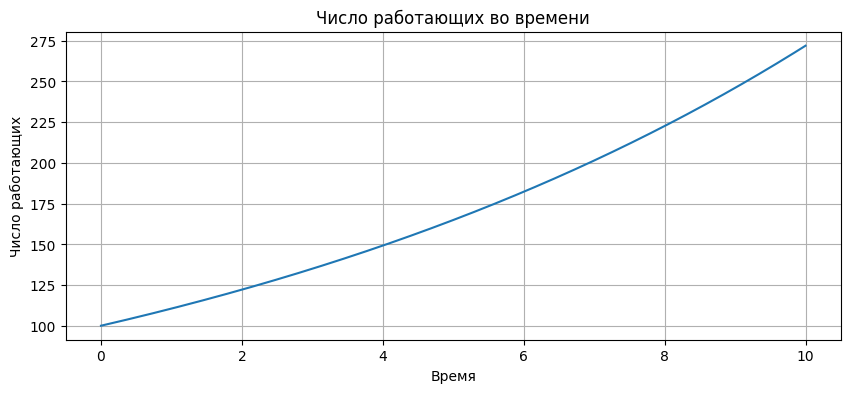

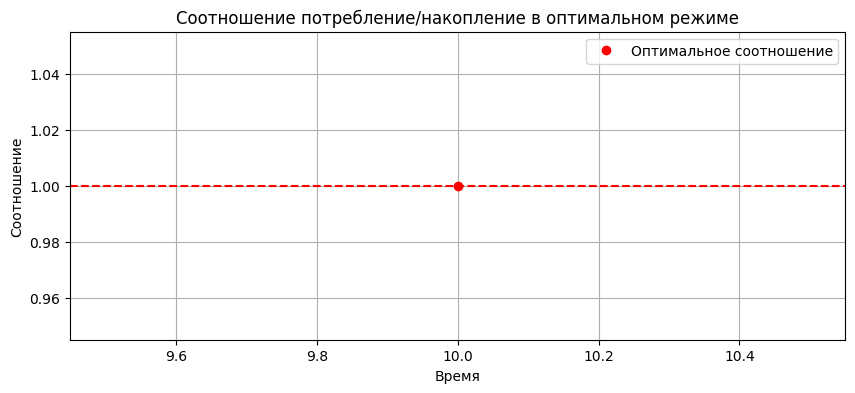

In [10]:

t_values = np.linspace(t_span[0], t_span[1], 1000)
R_values = R_0 * np.exp(alpha * t_values)
plt.figure(figsize=(10, 4))
plt.plot(t_values, R_values)
plt.title('Число работающих во времени')
plt.xlabel('Время')
plt.ylabel('Число работающих')
plt.grid(True)
plt.show()


t_optimal = t_span[1]
plt.figure(figsize=(10, 4))
plt.plot(t_optimal, optimal_w, 'ro', label='Оптимальное соотношение')
plt.axhline(optimal_w, color='r', linestyle='--')
plt.title('Соотношение потребление/накопление в оптимальном режиме')
plt.xlabel('Время')
plt.ylabel('Соотношение')
plt.grid(True)
plt.legend()
plt.show()